## Import requirements

You should have pandas and matplotlib installed.

Run:
$ pip install pandas matplotlib

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Read dataset

Dataset contains worldwide data about covid-19 from EU Open Data Portal.

Link: https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data

In [2]:
# Read the dataset
data = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')

## Dataset Processing

Dataset contains information that are not useful for getting cases for specific countries by date, so they should be removed. Also, the dataset should be in reversed order in order to plot the cases in ascending order.

In [3]:

# Delete useless columns
data = data.drop(
    columns=[
             'year_week',
             'deaths_weekly',
             'geoId',
             'popData2019',
             'countryterritoryCode',
             'continentExp',
             'notification_rate_per_100000_population_14-days',
             ]
    )

# Rename columns
data.rename(
    columns={
        'countriesAndTerritories': 'country',
        'dateRep': 'date',
        'cases_weekly': 'cases'
        }, inplace=True)

# Reverse the data (Plots are showed in a better way)
data = data.reindex(index=data.index[::-1])

## Creating final dataset

Creating the final dataset with 2 columns {date, cases} which will contain the sum of worldwide cases in each date. 

In [4]:
# Get all unique dates
dates = data.date.unique()

# Create final dataset
final_data = pd.DataFrame(columns=['date', 'cases'])

# Fill new dataset with worldwide data 
for date in dates:
  cases = 0
  new_data = data[data['date'].str.contains(date)]
  cases += new_data.cases.sum()
  final_data = final_data.append({'date': date, 'cases': cases}, ignore_index=True)

print(final_data)

          date    cases
0   23/03/2020   184368
1   30/03/2020   388094
2   06/04/2020   528553
3   13/04/2020   555304
4   20/04/2020   538711
5   27/04/2020   561776
6   04/05/2020   550802
7   11/05/2020   590722
8   18/05/2020   613234
9   25/05/2020   696151
10  01/06/2020   765215
11  08/06/2020   842885
12  15/06/2020   905490
13  22/06/2020  1048566
14  29/06/2020  1185288
15  06/07/2020  1336365
16  13/07/2020  1468209
17  20/07/2020  1597702
18  27/07/2020  1776615
19  03/08/2020  1810757
20  10/08/2020  1797101
21  17/08/2020  1833930
22  24/08/2020  1754561
23  31/08/2020  1817867
24  07/09/2020  1894262
25  14/09/2020  1909220
26  21/09/2020  2047265
27  28/09/2020  2075469
28  05/10/2020  2075923
29  12/10/2020  2321225
30  19/10/2020  2542708
31  26/10/2020  3060357
32  02/11/2020  3438731
33  09/11/2020  3882827
34  16/11/2020  4081069
35  23/11/2020  4139115
36  30/11/2020  4077196
37  07/12/2020  4297006
38  14/12/2020  4392359
39  21/12/2020  4555588
40  28/12/2020  

## Final dataset processing

The date format is changed and sorted by datetime in order to plot the cases in the right way.

In [5]:
# Beutify dates
final_data.date = pd.to_datetime(final_data['date'], format='%d/%m/%Y')

# Sort dataset by date
final_data = final_data.sort_values(by=['date'])

print(final_data)

         date    cases
42 2020-01-06       59
43 2020-01-13        1
44 2020-01-20      180
45 2020-01-27     2581
46 2020-02-03    14552
47 2020-02-10    23172
48 2020-02-17    30790
49 2020-02-24     8006
50 2020-03-02     9818
51 2020-03-09    21827
52 2020-03-16    62972
0  2020-03-23   184368
1  2020-03-30   388094
2  2020-04-06   528553
3  2020-04-13   555304
4  2020-04-20   538711
5  2020-04-27   561776
6  2020-05-04   550802
7  2020-05-11   590722
8  2020-05-18   613234
9  2020-05-25   696151
10 2020-06-01   765215
11 2020-06-08   842885
12 2020-06-15   905490
13 2020-06-22  1048566
14 2020-06-29  1185288
15 2020-07-06  1336365
16 2020-07-13  1468209
17 2020-07-20  1597702
18 2020-07-27  1776615
19 2020-08-03  1810757
20 2020-08-10  1797101
21 2020-08-17  1833930
22 2020-08-24  1754561
23 2020-08-31  1817867
24 2020-09-07  1894262
25 2020-09-14  1909220
26 2020-09-21  2047265
27 2020-09-28  2075469
28 2020-10-05  2075923
29 2020-10-12  2321225
30 2020-10-19  2542708
31 2020-10-

## Plot creation

Creating the cases plot with the right information.

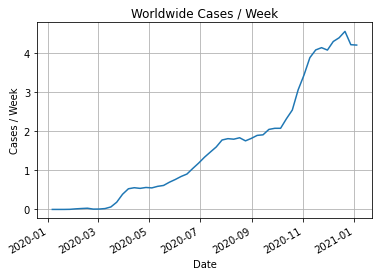

In [6]:
# Create plot
fig, ax = plt.subplots()
ax.plot(final_data['date'], final_data['cases'])

ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e6))
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylabel('val in millions')

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Set labels
ax.set(xlabel='Date', ylabel='Cases / Week', title='Worldwide Cases / Week')

# Show plots
fig.autofmt_xdate()
ax.grid()
plt.show()


## Total cases

Calculating the total cases and printing them.

In [7]:
# Print total dates
total_cases = str(final_data.cases.sum())
print("Total cases: " + total_cases)

Total cases: 84532824
